<a href="https://colab.research.google.com/github/RealMyeong/AIFFELTHON/blob/main/JinMyeong/%EC%9D%BC%EB%B0%98%EB%8C%80%ED%99%94_EDA%26KeyBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,431 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/일반대화/normal_conversation.csv')

In [3]:
data.head()

,Unnamed: 0,conversation,type
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터


In [4]:
data['type'].value_counts()

고객센터    29995
카카오     18000
Name: type, dtype: int64

In [5]:
data

,Unnamed: 0,conversation,type
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터
...,...,...,...
47990,48646,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기? 키키 집이랑 ...,카카오
47991,48647,주말에 보드 타러 갈래? 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거?...,카카오
47992,48648,우리 집 뒤에 중국집 가지마\n왜? 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,카카오
47993,48649,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,카카오


고객센터 대화에는 마스킹이 되어있음 `#@소속#` `#@이름# `의 형식임. 이러한 형태로 마스킹 된 유형이 무엇인지 확인하고 삭제할지 그대로 둘지를 판단해볼예정

In [6]:
import re

mask_list = []

for i in data['conversation']:
  pattern = '#.+#'
  regex_pattern = re.compile(pattern)

  mask = regex_pattern.findall(i)
  for j in mask:
    mask_list.append(j)

mask_set = set(mask_list)
mask_set

{'#@상품# #@기타#',
 '#@소속#나 #@소속#',
 '#@소속# 상담센터 #@소속#',
 '#@장소#에 있는 #@소속#',
 '#@이름#이고 연락처가 #@전번#',
 '#@전번# 로 한번 해 봐줄래요 #@전번#',
 '#@소속#유초등교육과 #@이름#',
 '#@이름#이고 #@전번#요 @전번#',
 '#@전번#번이고요 #@이름#',
 '#@이름# 회원님 확인되셨고요 #@상품#',
 '#@상품# 차량 구입하고 #@기타#',
 '#@계정# 아이디로 #@상품#',
 '#@소속#에서 #@소속#',
 '#@전번#입니다 이름은 #@이름#',
 '#이고요 #@전번#',
 '#@소속# 들어가셔서 #@상품#',
 '#@소속# 파트너 #@이름#',
 '#@소속#페이 이거는 #@소속#',
 '#@주소# 이고 #@소속#',
 '#@소속# 상담센터 상담사 #@이름#',
 '#@소속# 모빌리티 정책과 #@이름# 주무관 #@전번#',
 '#@상품# 텝으로 수강 중인데 #@상품#',
 '#@소속#앞 정류장이고요 #@소속#',
 '#@전번# 이시구요 #@이름#',
 '#@전번#이요 #@소속#',
 '#@이름# 이구 #@전번#',
 '#@상품#앱 상단 GNB 메뉴에서 설정 #@상품#',
 '#@전번#으로 연결하겠습니다 #@소속#',
 '#@이름#이구요 연락처는 #@번호#',
 '#@상품#은 #@전번#',
 '#@전번# 번이고요 지금 반품 접수하신 게 #@상품#',
 '#@이름# 선생님 강좌 중 #@상품#과 #@상품#',
 '#@기타# 브라우저에 설치된 #@기타#',
 '#@소속#을 이겼는데도 #@소속#',
 '#@전번#이고 이름은 #@이름#',
 '#@소속# 고객 만족 센터 #@이름#',
 '#@상품# 랑 #@소속#',
 '#@이름#이요 아마 그 상담 그거 하신 분은 #@이름#',
 '#@상품#라고 했는데요 혹시 #@소속#',
 '#@소속# 평생교육복지과 #@이름#',
 '#@소속#그룹의 통합 멤버십으로 #@기타#',
 '#@전번# 입니다 #@주소#',
 '#@상품#에서도 된다 하셨죠

In [7]:
import re

def preprocess(sen, mask=True):
  if mask:
    sen_list = sen.split('\n')
    clean_sen = []
    for i in sen_list:
      i = i.strip()
      i = re.sub(r'[^가-힣ㄱ-ㅎ0-9]', ' ', i)
      i = i.strip()
      clean_sen.append(i)
    sen = '\n'.join(clean_sen)

  else:
    sen_list = sen.split('\n')
    clean_sen = []
    for i in sen_list:
      i = i.strip()
      i = re.sub(r'[^가-힣ㄱ-ㅎ0-9]', ' ', i)
      i = re.sub(r'소속|주소|이름|전번|상품|회사|금융|번호|URL|기타|상담사', '', i)
      i = i.strip()
      clean_sen.append(i)
    sen = '\n'.join(clean_sen)

  return sen

In [8]:
data['clean_conversation'] = data['conversation'].apply(lambda x : preprocess(x))
data['del_mask_conversation'] = data['conversation'].apply(lambda x : preprocess(x, mask=False))
data.head()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...


In [9]:
data.tail()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation
47990,48646,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기? 키키 집이랑 ...,카카오,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기 키키 집이랑 ...,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기 키키 집이랑 ...
47991,48647,주말에 보드 타러 갈래? 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거?...,카카오,주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거 ...,주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거 ...
47992,48648,우리 집 뒤에 중국집 가지마\n왜? 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,카카오,우리 집 뒤에 중국집 가지마\n왜 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,우리 집 뒤에 중국집 가지마\n왜 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...
47993,48649,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,카카오,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...
47994,48650,요새 군대 편한가 봄? 옛날이랑 다르네\n왜 그러는데 니 어디 가서 그런 말 하면 ...,카카오,요새 군대 편한가 봄 옛날이랑 다르네\n왜 그러는데 니 어디 가서 그런 말 하면 ...,요새 군대 편한가 봄 옛날이랑 다르네\n왜 그러는데 니 어디 가서 그런 말 하면 ...


In [10]:
# kakao_3 = data[data['type']=='카카오'].sample(750)
# kakao_3

In [11]:
# cs_1 = data[data['type']=='고객센터'].sample(250)
# cs_1

In [12]:
data['space_conversation'] = data['del_mask_conversation'].apply(lambda x : re.sub(r'\n', ' ', x))

In [13]:
data.head()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation,space_conversation
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기 ...
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯...
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원...
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 네 맞습니...
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...,네 입니다 안녕하세요 입니다 네 안녕하세요 무슨 일이시죠 ...


In [14]:
# data = pd.concat([kakao_3, cs_1])
# data

In [15]:
data['class'] = '일반 대화'
data['binary_class'] = '일반 대화'
data.head()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation,space_conversation,class,binary_class
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기 ...,일반 대화,일반 대화
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯...,일반 대화,일반 대화
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원...,일반 대화,일반 대화
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 네 맞습니...,일반 대화,일반 대화
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...,네 입니다 안녕하세요 입니다 네 안녕하세요 무슨 일이시죠 ...,일반 대화,일반 대화


In [16]:
# norm_data = data[['del_mask_conversation', 'class', 'binary_class']]
# norm_data

In [17]:
# norm_data.rename(columns = {'del_mask_conversation' : 'spell_checked_conversation'}, inplace = True)
# norm_data.head()

In [18]:
# train_data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/add_biclass_train.csv')
# train_data.head()

In [19]:
# t_data = train_data[['class', 'spell_checked_conversation', 'binary_class']]
# t_data.head()

In [20]:
# train = pd.concat([t_data, norm_data], ignore_index=True)
# train

In [21]:
# train['class'].value_counts()
# train.to_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/라벨링 데이터/train_1000.csv')

In [22]:
data['clean_conversation'][0]

'반갑습니다   소속    이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기   소속  맞나요\n연결 된 곳은   소속 입니다\n도청적인 부분과 도청 외적인 부분은 검색으로 안내해드리고 있습니다\n어떤 문의이십니까\n언니 제가   전번  번 눌렀는데요\n네 서울시   소속 는   전번  으로 문의를 주셔야 합니다\n그럼 여기는 어디예요\n연결된 곳은   전번    소속 입니다\n언니 제가 주소가 천안에 돼 있기는 하는데요\n그럼 이 쪽으로 여쭤봐도 되나요\n네 어떤 문의이십니까\n제가 팩스 민원 신청에 대해서 여쭤보고 싶은데요\n제가 고등학교 졸업증명서하고 성적증명서를 발급을 받아야 되거든요\n그거 어떻게 받는지 좀 알고 싶어서요\n네 제가 확인 후 안내해 드리겠습니다 잠시만 기다려 주시겠습니까\n네 감사합니다 확인 부탁드립니다\n네 선생님 기다려 주셔서 감사합니다\n확인을 해보니 고등학교 성적 졸업증명서 관련해서 확인해 봤는데요\n가까운 학교 행정실을 방문 하셔야 할 것 같습니다\n또는 시도 교육청으로 방문을 해주시면 바로 발급이 가능하다고 합니다\n어디서나 민원이라는 시스템을 활용하실 수 있습니다\n가까운 도청 또는 민원실 및 동주민센터로 방문을 하시면됩니다\n팩스 신청을 하시는 부분으로 확인이 됩니다\n하지만 소요시간이 세 시간 정도 소요되는 부분으로 확인이 됩니다\n그래요 언니 제가 여기 천안을 가고 있기는 한데요\n제가 고등학교가 지방을 못 내려가서 그러는데요\n여기 천안에서도 처리가 가능한 건가요\n네 가까운 학교 행정실 그리고 시도 교육청 교육지원처에서 가능합니다\n도청 또는 시청 동 주민센터의 민원실로 방문을 해주시면 됩니다\n그럼 저는 가까운 도청이나 이런 쪽으로 가도 상관 없는 거예요\n네 맞습니다 그렇게 하시면 됩니다\n그럼 발급이 가능하다는 거죠\n네 선생님 그 부분까지는 저희 쪽에서 정확하게 확인이 어렵습니다\n방문하실 곳으로 전화로 문의 후 방문을 해주시면 더 좋으실 듯합니다\n네 감사합니다 수고하세요\n소속    이름 였

In [23]:
data['space_conversation'][0]

'반갑습니다        입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기     맞나요 연결 된 곳은    입니다 도청적인 부분과 도청 외적인 부분은 검색으로 안내해드리고 있습니다 어떤 문의이십니까 언니 제가     번 눌렀는데요 네 서울시    는     으로 문의를 주셔야 합니다 그럼 여기는 어디예요 연결된 곳은        입니다 언니 제가 가 천안에 돼 있기는 하는데요 그럼 이 쪽으로 여쭤봐도 되나요 네 어떤 문의이십니까 제가 팩스 민원 신청에 대해서 여쭤보고 싶은데요 제가 고등학교 졸업증명서하고 성적증명서를 발급을 받아야 되거든요 그거 어떻게 받는지 좀 알고 싶어서요 네 제가 확인 후 안내해 드리겠습니다 잠시만 기다려 주시겠습니까 네 감사합니다 확인 부탁드립니다 네 선생님 기다려 주셔서 감사합니다 확인을 해보니 고등학교 성적 졸업증명서 관련해서 확인해 봤는데요 가까운 학교 행정실을 방문 하셔야 할 것 같습니다 또는 시도 교육청으로 방문을 해주시면 바로 발급이 가능하다고 합니다 어디서나 민원이라는 시스템을 활용하실 수 있습니다 가까운 도청 또는 민원실 및 동주민센터로 방문을 하시면됩니다 팩스 신청을 하시는 부분으로 확인이 됩니다 하지만 소요시간이 세 시간 정도 소요되는 부분으로 확인이 됩니다 그래요 언니 제가 여기 천안을 가고 있기는 한데요 제가 고등학교가 지방을 못 내려가서 그러는데요 여기 천안에서도 처리가 가능한 건가요 네 가까운 학교 행정실 그리고 시도 교육청 교육지원처에서 가능합니다 도청 또는 시청 동 주민센터의 민원실로 방문을 해주시면 됩니다 그럼 저는 가까운 도청이나 이런 쪽으로 가도 상관 없는 거예요 네 맞습니다 그렇게 하시면 됩니다 그럼 발급이 가능하다는 거죠 네 선생님 그 부분까지는 저희 쪽에서 정확하게 확인이 어렵습니다 방문하실 곳으로 전화로 문의 후 방문을 해주시면 더 좋으실 듯합니다 네 감사합니다 수고하세요 였습니다'

토큰화 후 분석 시작



In [24]:
!pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 34.0 MB/s 


In [25]:
sen = data['space_conversation']

In [26]:
from soynlp.noun import LRNounExtractor_v2 #noun extracter v2
noun_extractor = LRNounExtractor_v2(verbose=True)
nouns = noun_extractor.train_extract(sen)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 368645 from 47995 sents. mem=0.433 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=4486859, mem=1.063 Gb
[Noun Extractor] batch prediction was completed for 82188 words
[Noun Extractor] checked compounds. discovered 57054 compounds
[Noun Extractor] postprocessing detaching_features : 80199 -> 53707
[Noun Extractor] postprocessing ignore_features : 53707 -> 53440
[Noun Extractor] postprocessing ignore_NJ : 53440 -> 51957
[Noun Extractor] 51957 nouns (57054 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.234 Gb                    
[Noun Extractor] 60.28 % eojeols are covered


In [27]:
list((nouns.keys()))[:150]

['공무원채용신체검사서',
 '외국인관광도시민박업',
 '교통사고사실확인인원',
 '학교시설유지관리지원',
 '수상레저사업등록증',
 '개인정보제공동의서',
 '국민기초생활수급자',
 '마산지방해양수산청',
 '민주시민생활교육과',
 '일부사항증명서제도',
 '국가평생교육진흥원',
 '한국사능력검정시험',
 '도로점용허가신청서',
 '납세자보호담당관실',
 '장애인전용주차구역',
 '운전면허자격증사본',
 '한국건설기술연구원',
 '천안종합버스터미널',
 '외국인종합안내센터',
 '과학기술정보통신부',
 '한국해양수산연수원',
 '태안공용버스터미널',
 '아산시외버스터미널',
 '학교교권보호위원회',
 '노인맞춤돌봄서비스',
 '동력수상레저면허증',
 '해양오염방지관리인',
 '폐수무방류배출시설',
 '항만운영정보시스템',
 '과천하수종말처리장',
 '학교운영위원회규정',
 '학원설립운영등록증',
 '업무전용자동차보험',
 '모범음식점육성자금',
 '택시운전자격증사본',
 '국가철도망구축계획',
 '환경분쟁조정위원회',
 '예산국토관리사무소',
 '한가람디자인미술관',
 '예상사업수지계산서',
 '항공안전관리시스템',
 '자체감사처분심의회',
 '국민기초생활보장법',
 '항만시설적합확인서',
 '아동복지심의위원회',
 '스포츠관련서비스업',
 '학업성적관리위원회',
 '원격업무지원서비스',
 '중부자동차매매단지',
 '학폭대책심의위원회',
 '초중등교육법시행령',
 '중앙토지수용위원회',
 '소비자분쟁해결기준',
 '교육시설재난공제회',
 '한국소방마이스터고',
 '학교시설공사매뉴얼',
 '항만시설보안계획서',
 '국민내일배움카드제',
 '항공통신업무종사자',
 '교육환경보호구역',
 '일시수용능력인원',
 '개인통관고유부호',
 '마이스터고등학교',
 '말씀해주시겠습니',
 '특수교육지원센터',
 '사업자등록신청서',
 '국제선박보안증서',
 '해양조사정보업자',
 '주정차위반과태료',
 '가족관계증명서류',
 '국도대체우회도로',
 '아이스아메리카노',
 

In [28]:
list(noun_extractor._compounds_components.items())[:5]

[('행정소송사건관련으로', ('행정소송사건', '관련으로')),
 ('소방설비기사자격증', ('소방', '설비', '기사자격증')),
 ('경제교육지원법', ('경제교육', '지원법')),
 ('교육환경보호구역에서', ('교육환경보호구역', '에서')),
 ('국가배상심의위원회', ('국가배상', '심의위원회'))]

In [29]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=5,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sen) # list of str or like
words = word_extractor.extract()

training was done. used memory 1.937 Gb
all cohesion probabilities was computed. # words = 132751
all branching entropies was computed # words = 186316
all accessor variety was computed # words = 186316


In [30]:
from soynlp.tokenizer import LTokenizer # LTokenizer 이용

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [31]:
tokenizer.tokenize(data['space_conversation'][0], flatten=True)

['반갑습니다',
 '입니다',
 '무엇을',
 '도와드릴까요',
 '여보세요',
 '네',
 '안녕하세요',
 '거기',
 '맞나요',
 '연결',
 '된',
 '곳은',
 '입니다',
 '도청적인',
 '부분',
 '과',
 '도청',
 '외적인',
 '부분',
 '은',
 '검색',
 '으로',
 '안내해드리',
 '고',
 '있습니다',
 '어떤',
 '문의',
 '이십니까',
 '언니',
 '제가',
 '번',
 '눌렀는데',
 '요',
 '네',
 '서울',
 '시',
 '는',
 '으로',
 '문의',
 '를',
 '주셔야',
 '합니다',
 '그럼',
 '여기',
 '는',
 '어디',
 '예요',
 '연결',
 '된',
 '곳은',
 '입니다',
 '언니',
 '제가',
 '가',
 '천안',
 '에',
 '돼',
 '있기는',
 '하는데요',
 '그럼',
 '이',
 '쪽으로',
 '여쭤봐도',
 '되나요',
 '네',
 '어떤',
 '문의',
 '이십니까',
 '제가',
 '팩스',
 '민원',
 '신청',
 '에',
 '대해서',
 '여쭤보',
 '고',
 '싶은데',
 '요',
 '제가',
 '고등학교',
 '졸업',
 '증명서하고',
 '성적증명서',
 '를',
 '발급',
 '을',
 '받아',
 '야',
 '되거든요',
 '그거',
 '어떻게',
 '받는',
 '지',
 '좀',
 '알고',
 '싶어서요',
 '네',
 '제가',
 '확인',
 '후',
 '안내해',
 '드리겠습니다',
 '잠시만',
 '기다려',
 '주시겠습니까',
 '네',
 '감사합니다',
 '확인',
 '부탁드립니다',
 '네',
 '선생님',
 '기다려',
 '주셔서',
 '감사합니다',
 '확인',
 '을',
 '해보',
 '니',
 '고등학교',
 '성적',
 '졸업',
 '증명서',
 '관련해서',
 '확인',
 '해',
 '봤는데',
 '요',
 '가까운',
 '학교',
 '행정',
 '실을',
 '방문',
 '하셔야',
 '할',
 '것',
 '같

In [32]:
data['tokenized'] = data['space_conversation'].apply(lambda x : tokenizer.tokenize(x, flatten=True))

In [33]:
data

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation,space_conversation,class,binary_class,tokenized
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기 ...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 여보세요, 네, 안녕하세요, 거기, ..."
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯...,일반 대화,일반 대화,"[조직도, 확인, 후, 연락, 드렸습니다, 정확한, 문의, 는, 부서에, 문의, 를..."
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 제가, 주택, 임대차, 로, 분쟁조정..."
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 네 맞습니...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와, 드릴까요, 여기, 요, 인가요, 네, 맞습니..."
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...,네 입니다 안녕하세요 입니다 네 안녕하세요 무슨 일이시죠 ...,일반 대화,일반 대화,"[네, 입니다, 안녕하세요, 입니다, 네, 안녕하세요, 무슨, 일이시죠, 안녕하세요..."
...,...,...,...,...,...,...,...,...,...
47990,48646,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기? 키키 집이랑 ...,카카오,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기 키키 집이랑 ...,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키\n갑자기 키키 집이랑 ...,요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄 키키 갑자기 키키 집이랑 만...,일반 대화,일반 대화,"[요즘, 에, 엄마, 가, 나, 씻고, 화장, 하면, 남자, 만나, 냐고, 물어, ..."
47991,48647,주말에 보드 타러 갈래? 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거?...,카카오,주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거 ...,주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대\n뭐 바퀴 달린 거 ...,주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대 뭐 바퀴 달린 거 ...,일반 대화,일반 대화,"[주말에, 보드, 타러, 갈래, 사상에, 괜찮, 은, 데, 있음, 잘, 가르치던대,..."
47992,48648,우리 집 뒤에 중국집 가지마\n왜? 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,카카오,우리 집 뒤에 중국집 가지마\n왜 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,우리 집 뒤에 중국집 가지마\n왜 너 거기 좋아했잖아 맛있다며\n다 다음 달까지 ...,우리 집 뒤에 중국집 가지마 왜 너 거기 좋아했잖아 맛있다며 다 다음 달까지 거기...,일반 대화,일반 대화,"[우리, 집, 뒤에, 중국, 집, 가지마, 왜, 너, 거기, 좋아, 했잖아, 맛있,..."
47993,48649,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,카카오,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,엄마 생신 선물 눈치 게임 실패했다 아 키키\n왜 너희 오빠랑 같이 준비해서 드린다...,엄마 생신 선물 눈치 게임 실패했다 아 키키 왜 너희 오빠랑 같이 준비해서 드린다고...,일반 대화,일반 대화,"[엄마, 생신, 선물, 눈치, 게임, 실패했다, 아, 키키, 왜, 너희, 오빠, 랑..."


In [34]:
cs_data = data[data['type']=='고객센터']['tokenized']
kakao_data = data[data['type']=='카카오']['tokenized']

In [35]:
cs_data

0        [반갑습니다, 입니다, 무엇을, 도와드릴까요, 여보세요, 네, 안녕하세요, 거기, ...
1        [조직도, 확인, 후, 연락, 드렸습니다, 정확한, 문의, 는, 부서에, 문의, 를...
2        [반갑습니다, 입니다, 무엇을, 도와드릴까요, 제가, 주택, 임대차, 로, 분쟁조정...
3        [반갑습니다, 입니다, 무엇을, 도와, 드릴까요, 여기, 요, 인가요, 네, 맞습니...
4        [네, 입니다, 안녕하세요, 입니다, 네, 안녕하세요, 무슨, 일이시죠, 안녕하세요...
                               ...                        
29990    [상담원, 입니다, 무엇을, 도와드릴까요, 네, 안녕하세요, 궁금, 한, 게, 있어...
29991    [반갑습니다, 상담원, 입니다, 무엇을, 도와드릴까요, 안녕하세요, 제가, 궁금, ...
29992    [안녕하세요, 상담원, 입니다, 무엇을, 도와드릴까요, 안녕하세요, 등급, 전체를,...
29993    [안녕하세요, 상담원, 입니다, 무엇을, 도와드릴까요, 안녕하세요, 제가, 궁금, ...
29994    [상담원, 입니다, 무엇을, 도와드릴까요, 안녕하세요, 제가, 궁금, 한, 게, 있...
Name: tokenized, Length: 29995, dtype: object

In [36]:
kakao_data

29995    [아니, 야, 싫어, 난, 자격증, 공부, 나, 할래, 자격증, 공부, 는, 좀, ...
29996    [자격증, 을, 딸까, 아니, 면, 지금, 하고, 있는, 일에, 집중할까, 흠, 너...
29997    [니는, 예능, 프로그램, 챙겨, 보는, 거, 뭐, 있어, 키키, 음, 대탈출, 챙...
29998    [오늘, 에서, 점심, 은, 뭐, 먹었어, 오늘, 은, 그냥, 지나가다가, 햄버거,...
29999    [오늘, 버스, 히터, 틀어, 줬어, 오, 대박, 드디어, 버스, 에서도, 틀어, ...
                               ...                        
47990    [요즘, 에, 엄마, 가, 나, 씻고, 화장, 하면, 남자, 만나, 냐고, 물어, ...
47991    [주말에, 보드, 타러, 갈래, 사상에, 괜찮, 은, 데, 있음, 잘, 가르치던대,...
47992    [우리, 집, 뒤에, 중국, 집, 가지마, 왜, 너, 거기, 좋아, 했잖아, 맛있,...
47993    [엄마, 생신, 선물, 눈치, 게임, 실패했다, 아, 키키, 왜, 너희, 오빠, 랑...
47994    [요새, 군대, 편한가, 봄, 옛날, 이랑, 다르네, 왜, 그러, 는데, 니, 어디...
Name: tokenized, Length: 18000, dtype: object

- 고객센터 길이 분포와 빈도수 확인

문장의 최단 길이 :  20
문장의 최장 길이 :  522
문장의 평균 길이 :  84


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_te

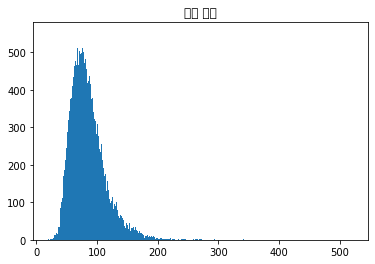

In [37]:
# 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in cs_data:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(cs_data))

sentence_length = [len(x) for x in cs_data]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('길이 분포')
plt.show()

<BarContainer object of 30 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_

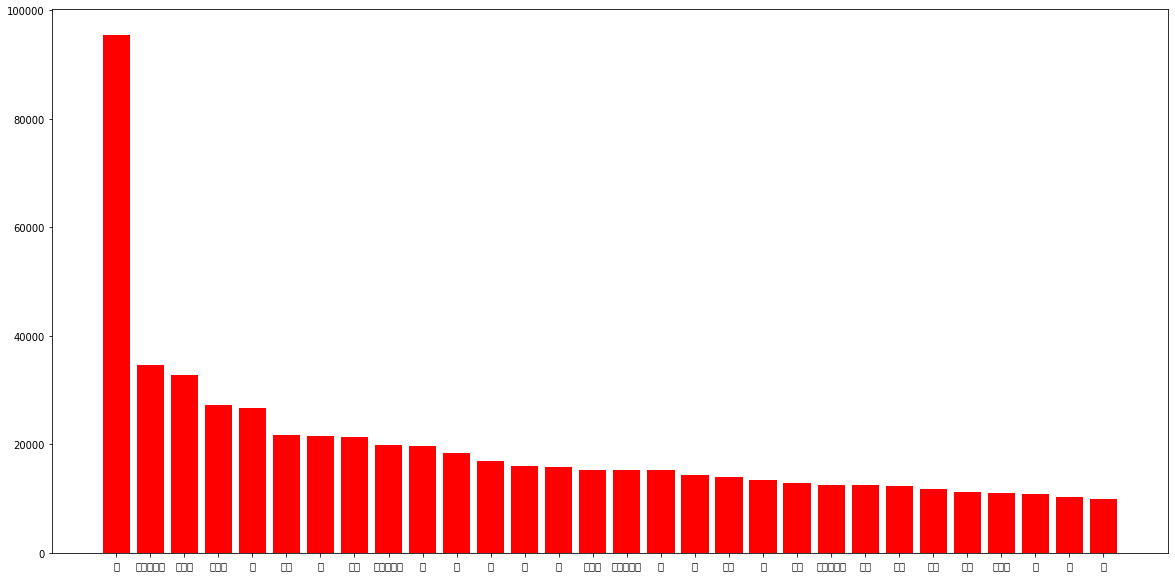

In [38]:
from collections import defaultdict

# 단어 빈도 확인
token = []

for x in cs_data:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

- 카카오톡 대화 길이분포와 빈도수 확인

문장의 최단 길이 :  10
문장의 최장 길이 :  495
문장의 평균 길이 :  155


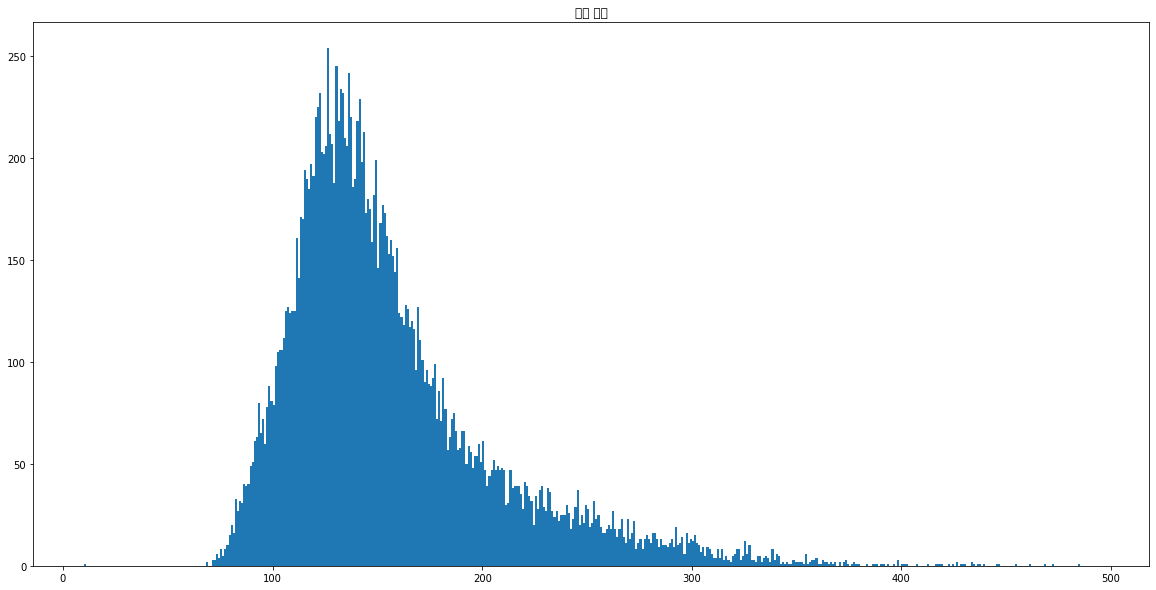

In [39]:
# 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in kakao_data:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(kakao_data))

sentence_length = [len(x) for x in kakao_data]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('길이 분포')
plt.show()

<BarContainer object of 30 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_

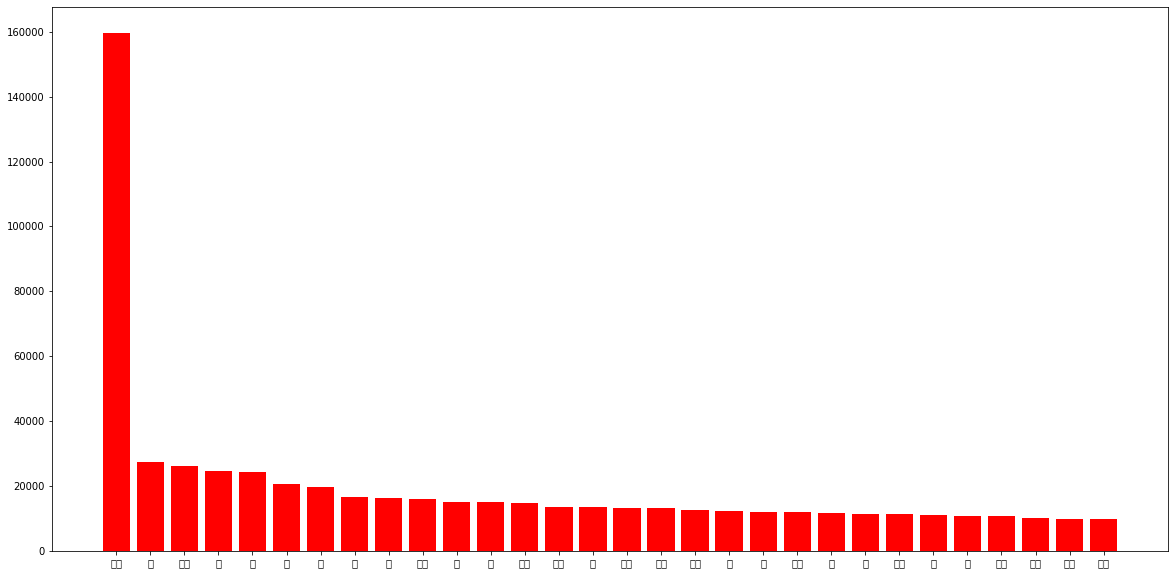

In [40]:
# 단어 빈도 확인
token = []

for x in kakao_data:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

카카오톡 데이터에서는 '키키'와 'ㅜㅜ'같은 이모티콘 삭제

고객센터 데이터에서는 '네'를 삭제하는 게 좋아보임

이 두개가 너무 많아서 모델이 분류를 너무 잘하기도하고 TUNiB test데이터에 이러한 단어가 없다면 분류를 잘 못할 것 같음.

In [41]:
clean_data = []

for i in data['tokenized']:
  word = i
  filter_word = []
  for j in word:
    if j != '키키' and j != '네':
      filter_word.append(j)
  filter_sen = ' '.join(filter_word)
  clean_data.append(filter_sen)


In [42]:
data['filtered_conversation'] = clean_data

In [43]:
data.head()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation,space_conversation,class,binary_class,tokenized,filtered_conversation
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기 ...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 여보세요, 네, 안녕하세요, 거기, ...",반갑습니다 입니다 무엇을 도와드릴까요 여보세요 안녕하세요 거기 맞나요 연결 된 곳은...
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯...,일반 대화,일반 대화,"[조직도, 확인, 후, 연락, 드렸습니다, 정확한, 문의, 는, 부서에, 문의, 를...",조직도 확인 후 연락 드렸습니다 정확한 문의 는 부서에 문의 를 해보시면 좋으실 듯...
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 제가, 주택, 임대차, 로, 분쟁조정...",반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차 로 분쟁조정위원회쪽을 통화 ...
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 네 맞습니...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와, 드릴까요, 여기, 요, 인가요, 네, 맞습니...",반갑습니다 입니다 무엇을 도와 드릴까요 여기 요 인가요 맞습니다 입니다 혹시 죄송 ...
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...,네 입니다 안녕하세요 입니다 네 안녕하세요 무슨 일이시죠 ...,일반 대화,일반 대화,"[네, 입니다, 안녕하세요, 입니다, 네, 안녕하세요, 무슨, 일이시죠, 안녕하세요...",입니다 안녕하세요 입니다 안녕하세요 무슨 일이시죠 안녕하세요 주사님 한 가지 문의 ...


In [44]:
# 전처리 진행
# 그 중에서도 특히 '키키'와 '네'는 직접 지정해서 삭제

def preprocess_sentence(sentence):

    sentence = sentence.strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^가-힣?.!,]+", " ", sentence)
    sentence = re.sub(r"키키|네|고객님|상담사", "", sentence)
    sentence = sentence.strip()

    sentence = sentence.strip()
    
    return sentence

In [45]:
data['cleaned_conversation'] = data['del_mask_conversation'].apply(lambda x : preprocess_sentence(x))

In [46]:
data['cleaned_conversation']

0        반갑습니다 입니다 무엇을 도와드릴까요 여보세요  안녕하세요 거기 맞나요 연결 된 곳...
1        조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯 합니...
2        반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원회쪽을 통화를 ...
3        반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요  맞습니다 입니다  혹시 죄송...
4        입니다 안녕하세요 입니다  안녕하세요 무슨 일이시죠 안녕하세요 주사님 한 가지 문의...
                               ...                        
47990    요즘에 엄마가 나 씻고 화장하면 남자 만나냐고 물어봄  갑자기  집이랑 만 왔다 갔...
47991    주말에 보드 타러 갈래 사상에 괜찮은 데 있음 잘 가르치던대 뭐 바퀴 달린 거 그거...
47992    우리 집 뒤에 중국집 가지마 왜 너 거기 좋아했잖아 맛있다며 다 다음 달까지 거기서...
47993    엄마 생신 선물 눈치 게임 실패했다 아  왜 너희 오빠랑 같이 준비해서 드린다고 했...
47994    요새 군대 편한가 봄 옛날이랑 다르 왜 그러는데 니 어디 가서 그런 말 하면 돌 맞...
Name: cleaned_conversation, Length: 47995, dtype: object

In [47]:
data.head()

,Unnamed: 0,conversation,type,clean_conversation,del_mask_conversation,space_conversation,class,binary_class,tokenized,filtered_conversation,cleaned_conversation
0,0,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 ...,반갑습니다 입니다 무엇을 도와드릴까요\n여보세요 네 안녕하세요 거기 ...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 네 안녕하세요 거기 ...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 여보세요, 네, 안녕하세요, 거기, ...",반갑습니다 입니다 무엇을 도와드릴까요 여보세요 안녕하세요 거기 맞나요 연결 된 곳은...,반갑습니다 입니다 무엇을 도와드릴까요 여보세요 안녕하세요 거기 맞나요 연결 된 곳...
1,1,#@소속# 조직도 확인 후 연락드렸습니다.\n정확한 문의는 #@소속#부서에 문의를 ...,고객센터,소속 조직도 확인 후 연락드렸습니다\n정확한 문의는 소속 부서에 문의를 해보시...,조직도 확인 후 연락드렸습니다\n정확한 문의는 부서에 문의를 해보시면 좋으실 ...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯...,일반 대화,일반 대화,"[조직도, 확인, 후, 연락, 드렸습니다, 정확한, 문의, 는, 부서에, 문의, 를...",조직도 확인 후 연락 드렸습니다 정확한 문의 는 부서에 문의 를 해보시면 좋으실 듯...,조직도 확인 후 연락드렸습니다 정확한 문의는 부서에 문의를 해보시면 좋으실 듯 합니...
2,2,반갑습니다 #@소속# #@이름#입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분...,반갑습니다 입니다 무엇을 도와드릴까요\n제가 주택 임대차로 분쟁조정위...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와드릴까요, 제가, 주택, 임대차, 로, 분쟁조정...",반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차 로 분쟁조정위원회쪽을 통화 ...,반갑습니다 입니다 무엇을 도와드릴까요 제가 주택 임대차로 분쟁조정위원회쪽을 통화를 ...
3,3,반갑습니다 #@소속# #@이름#입니다 무엇을 도와 드릴까요\n여기요 #@소속#인가...,고객센터,반갑습니다 소속 이름 입니다 무엇을 도와 드릴까요\n여기요 소속 인가...,반갑습니다 입니다 무엇을 도와 드릴까요\n여기요 인가요\n네 맞...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 네 맞습니...,일반 대화,일반 대화,"[반갑습니다, 입니다, 무엇을, 도와, 드릴까요, 여기, 요, 인가요, 네, 맞습니...",반갑습니다 입니다 무엇을 도와 드릴까요 여기 요 인가요 맞습니다 입니다 혹시 죄송 ...,반갑습니다 입니다 무엇을 도와 드릴까요 여기요 인가요 맞습니다 입니다 혹시 죄송...
4,4,네 #@소속# #@이름#입니다\n안녕하세요 #@소속# #@이름#입니다\n네 안녕하세...,고객센터,네 소속 이름 입니다\n안녕하세요 소속 이름 입니다\n네 안녕하세...,네 입니다\n안녕하세요 입니다\n네 안녕하세요 무슨 일이시...,네 입니다 안녕하세요 입니다 네 안녕하세요 무슨 일이시죠 ...,일반 대화,일반 대화,"[네, 입니다, 안녕하세요, 입니다, 네, 안녕하세요, 무슨, 일이시죠, 안녕하세요...",입니다 안녕하세요 입니다 안녕하세요 무슨 일이시죠 안녕하세요 주사님 한 가지 문의 ...,입니다 안녕하세요 입니다 안녕하세요 무슨 일이시죠 안녕하세요 주사님 한 가지 문의...


In [48]:
# data.to_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/norm_data.csv')

## KeyBERT 사용해서 키워드 뽑아보기

In [1]:

import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

KeyError: ignored

In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)


In [2]:
!pip install konlpy
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import itertools

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/add_biclass_train.csv')

In [5]:
data.head()

,Unnamed: 0,class,conversation,labelling,label_sentence,cleaned_sentence,spell_checked_conversation,binary_class
0,0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...,공격 대화
1,1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...,공격 대화
2,2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...,원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...,공격 대화
3,3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...,공격 대화
4,4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...,너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...,공격 대화


In [6]:
# 직장 내 괴롭힘
workplace = ' '.join(list(data[data['class']=='직장 내 괴롭힘 대화']['spell_checked_conversation']))

In [7]:
doc = workplace

In [8]:
okt = Okt()

tokenized_doc = okt.pos(doc)
tokenized_nouns = ' '.join([word[0] for word in tokenized_doc if word[1] == 'Noun' or word[1] == 'Verb'])

print('품사 태깅 10개만 출력 :',tokenized_doc[:10])
print('명사 추출 :',tokenized_nouns)

품사 태깅 10개만 출력 : [('길동', 'Noun'), ('씨', 'Noun'), ('이번', 'Noun'), ('에', 'Josa'), ('이', 'Determiner'), ('것', 'Noun'), ('좀', 'Noun'), ('처리', 'Noun'), ('해요', 'Verb'), ('\n', 'Foreign')]
명사 추출 : 길동 씨 이번 것 좀 처리 해요 거 제 한 게 팀 내 네 가 어딨어 이건 제 쓴 게 이번 인사 고과 기간 알 네 이건 제 덤터기 쓸 이번 거만 해주면 길동 씨 데리 갈게 네 내 길동 씨 계약 만료 자고 할까 네 제 처리 할게요 씨 오늘 뭐 해 저 약속 누구 요 남자친구 네 에이 왜 말 안 해줘 우리 사이 개인 일이 말씀드리고 싶지 않아요 씨 사회생활 한다 친구 친구 거 아냐 네 어머 표정 봐 표정 감정 드러내면 회사 생활 한다 지은 씨 요즘 왜 출근시간 늦죠 제 집 원래 전 오더니 갑자기 전 오고 어찌 됐건 정시 일만 시작 할 수 언제 오든 되는 거 사회생활 하라 누가 말 했어요 전 다른 나 어이 말대꾸 꼬박꼬박 하는 거 하며 신입 또 첨 말대답 은 내일 다시 원래 전 와서 세팅해놔 일 할 수 네 김 대리 거 프로젝트 왜 완료 거지 과장 프로젝트 다음 주 연기 되었다고 메일 받아서 진행 중 이 사람 정신 그 메일 이후 다시 메일 보낸 거 몰라 기한 이번 주야 전 메일 받은 적 다음 주까 지인 줄 알았습니다 과장 메일 확인 제대로 안 하다니 누구 김 대리 메일 전달 사람 과장 김 대리 그때 연차 였어요 아마 메일 첨부 거 머 거 지금 내일 마무리 되어야 하는데 누가 책임질 저 내용 몰랐습니다 과장 최대한 다음 주 내 하겠습니다 웃기 마 부서장 결제 하신 일 이번 주 주말 출근 해서 끝내도록 해 과장 이번 주 주말 날 샌다고 해도 합니다 저 회사 그만두겠습니다 너 일 물어보고 하랬 네 저 저번 알아서 하시라고 뭐 똑바로 말 해 왜 웅 얼거려 너 뭐 제대로 하는 게 살 쪄가지고 너 거 징계 감 나 하려고 지 징계 직장 잘리고 싶어 팀

In [9]:
n_gram_range = (1, 2)

count = CountVectorizer(ngram_range=n_gram_range).fit([tokenized_nouns])
candidates = count.get_feature_names_out()

print('trigram 개수 :',len(candidates))
print('trigram 다섯개만 출력 :',candidates[:5])

trigram 개수 : 36728
trigram 다섯개만 출력 : ['가게' '가게 말씀드리고' '가게 언제' '가게 업계' '가게 와서']


In [10]:
model = SentenceTransformer('bongsoo/moco-sentencedistilbertV2.1')

In [11]:
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

In [12]:
top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [13]:
keywords

['가자 했나요',
 '알았으면 가서',
 '모르면 물어보셔야죠',
 '물어봐도 될까',
 '되는 모르십니까',
 '물어봐야 하는',
 '하던지 이러면',
 '물어봤어야지',
 '될까 물어봐야',
 '알겠습니다 꼬나봐']

여기서는 다양한 키워드들을 얻기 위해서 두 가지 알고리즘을 사용합니다.

Max Sum Similarity  
Maximal Marginal Relevance

max sum similarity   
데이터 쌍 사이의 최대 합 거리는 데이터 쌍 간의 거리가 최대화되는 데이터 쌍으로 정의됩니다. 여기서의 의도는 후보 간의 유사성을 최소화하면서 문서와의 후보 유사성을 극대화하고자 하는 것입니다.



In [14]:
def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # 문서와 각 키워드들 간의 유사도
    distances = cosine_similarity(doc_embedding, candidate_embeddings)

    # 각 키워드들 간의 유사도
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # 코사인 유사도에 기반하여 키워드들 중 상위 top_n개의 단어를 pick.
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # 각 키워드들 중에서 가장 덜 유사한 키워드들간의 조합을 계산
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [ ]:
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=5, nr_candidates=10)

3. Maximal Marginal Relevance  
결과를 다양화하는 마지막 방법은 MMR(Maximum Limit Relegance)입니다. MMR은 텍스트 요약 작업에서 중복을 최소화하고 결과의 다양성을 극대화하기 위해 노력합니다. 참고 할 수 있는 자료로 EmbedRank(https://arxiv.org/pdf/1801.04470.pdf) 라는 키워드 추출 알고리즘은 키워드를 다양화하는 데 사용할 수 있는 MMR을 구현했습니다. 먼저 문서와 가장 유사한 키워드를 선택합니다. 그런 다음 문서와 유사하고 이미 선택된 키워드와 유사하지 않은 새로운 후보를 반복적으로 선택합니다.

In [ ]:
def mmr(doc_embedding, candidate_embeddings, words, top_n, diversity):

    # 문서와 각 키워드들 간의 유사도가 적혀있는 리스트
    word_doc_similarity = cosine_similarity(candidate_embeddings, doc_embedding)

    # 각 키워드들 간의 유사도
    word_similarity = cosine_similarity(candidate_embeddings)

    # 문서와 가장 높은 유사도를 가진 키워드의 인덱스를 추출.
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # keywords_idx = [2]
    keywords_idx = [np.argmax(word_doc_similarity)]

    # 가장 높은 유사도를 가진 키워드의 인덱스를 제외한 문서의 인덱스들
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # ==> candidates_idx = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10 ... 중략 ...]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    # 최고의 키워드는 이미 추출했으므로 top_n-1번만큼 아래를 반복.
    # ex) top_n = 5라면, 아래의 loop는 4번 반복됨.
    for _ in range(top_n - 1):
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # MMR을 계산
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # keywords & candidates를 업데이트
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [ ]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=10, diversity=0.5)